In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)
sns.color_palette("husl", 8)
%matplotlib inline

In [71]:
df1 = pd.read_csv(r'Datasets\US UCLA Admission\Admission_Predict.csv')
df2 = pd.read_csv(r'Datasets\US UCLA Admission\Admission_Predict_Ver1.1.csv')

In [72]:
df1.drop(columns='Serial No.',axis=1,inplace=True)
print(df1.shape)
df1.head()

(400, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [73]:
df2.drop(columns='Serial No.',axis=1,inplace=True)
print(df2.shape)
df2.head()

(500, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [74]:
df = pd.concat([df1,df2])
print(df.shape)
df.head()

(900, 8)


,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [106]:
df.describe([0.15,0.30,0.75,0.95])

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
count,900.000000,900.000000,900.000000,900.000000,900.00000,900.000000,900.000000,900.000000
mean,316.621111,107.288889,3.102222,3.385556,3.47000,8.586433,0.554444,0.722900
std,11.369700,6.073968,1.143048,0.997612,0.91319,0.600822,0.497303,0.141722
min,290.000000,92.000000,1.000000,1.000000,1.00000,6.800000,0.000000,0.340000
15%,303.000000,100.000000,2.000000,2.500000,2.50000,7.958500,0.000000,0.570000
30%,311.000000,104.000000,2.000000,3.000000,3.00000,8.237000,0.000000,0.650000
50%,317.000000,107.000000,3.000000,3.500000,3.50000,8.570000,1.000000,0.730000
75%,325.000000,112.000000,4.000000,4.000000,4.00000,9.052500,1.000000,0.822500
95%,335.000000,118.000000,5.000000,5.000000,5.00000,9.600000,1.000000,0.940000
max,340.000000,120.000000,5.000000,5.000000,5.00000,9.920000,1.000000,0.970000


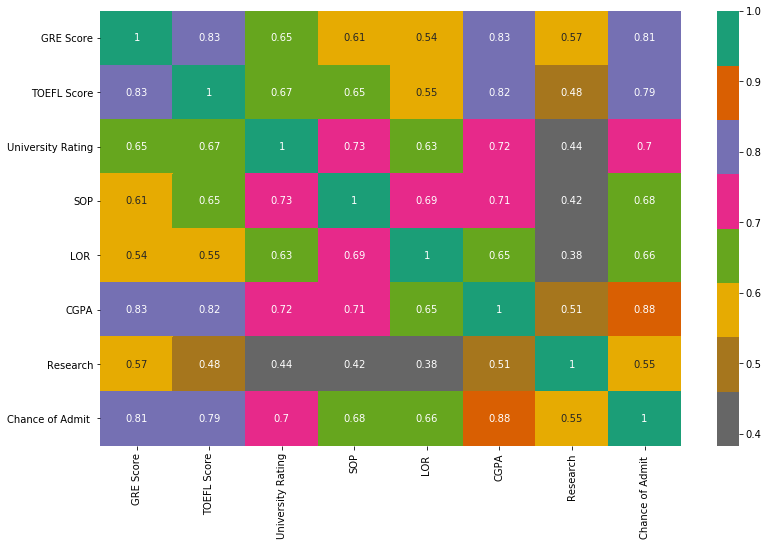

In [112]:
plt.figure(figsize=(13,8))
sns.heatmap(df.corr(), annot=True, cmap='Dark2_r')

In [76]:
df.isnull().sum()

GRE Score            0
TOEFL Score          0
University Rating    0
SOP                  0
LOR                  0
CGPA                 0
Research             0
Chance of Admit      0
dtype: int64

In [77]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


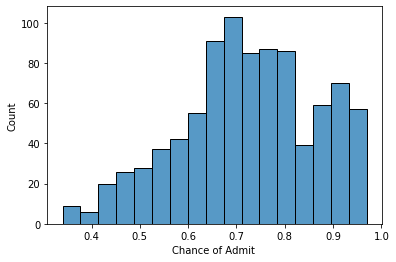

In [102]:
sns.histplot(df['Chance of Admit ']);

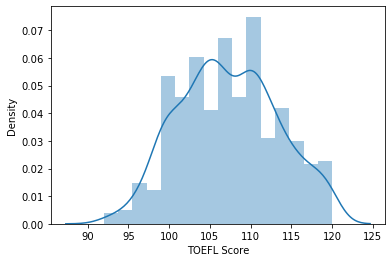

In [99]:
sns.distplot(df['TOEFL Score']);

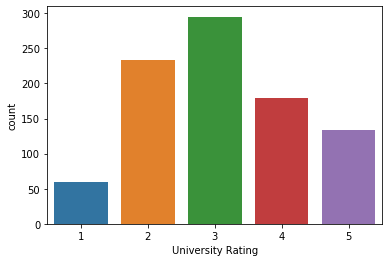

In [19]:
sns.countplot(df['University Rating']);

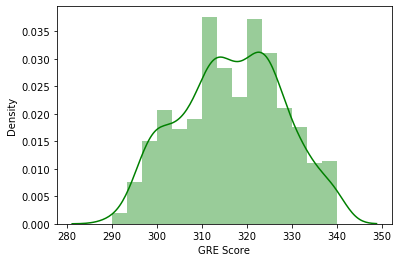

In [95]:
sns.color_palette("viridis", as_cmap=True)
sns.distplot(df['GRE Score'], color='g');

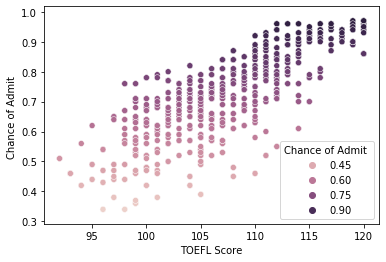

In [34]:
sns.scatterplot(df['TOEFL Score'], df['Chance of Admit '], hue=df['Chance of Admit '] );

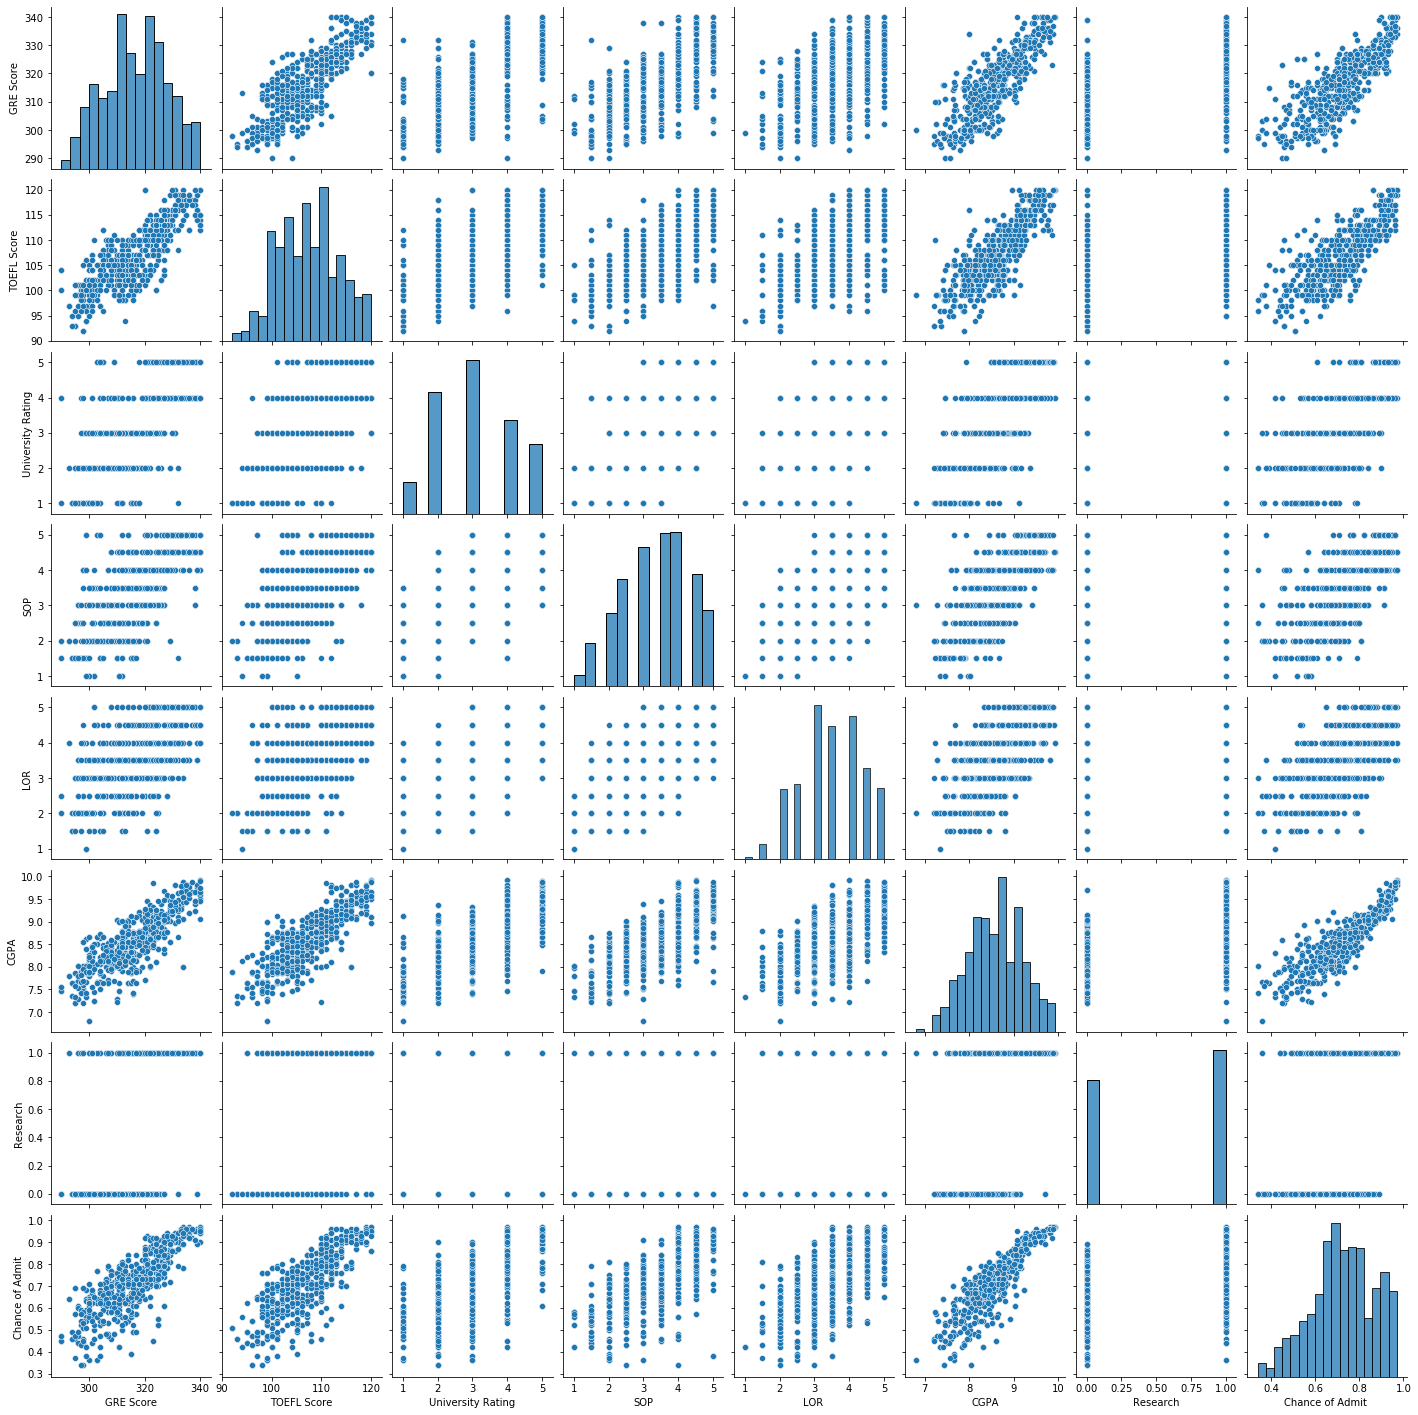

In [63]:
from sklearn.model_selection import train_test_split
X = df.drop(['Chance of Admit '],axis=1)
y = df['Chance of Admit ']
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,
                                                 random_state=30,shuffle=True,stratify=df['University Rating'])

In [64]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score,mean_absolute_error

In [70]:
lr = LinearRegression(normalize=True)
lr.fit(X_train,y_train)

LinearRegression(normalize=True)

In [71]:
y_pred = lr.predict(X_test)

In [79]:
print('MAE :',mean_absolute_error(y_test,y_pred))
print("R2 Score :",r2_score(y_test,y_pred))

MAE : 0.04080543912324644
R2 Score : 0.8245045612001178


In [97]:
output = pd.DataFrame({"Y True":y_test,'Y Predicted':y_pred})
output['Y True'] = output['Y True'].apply(rep)
output['Y Predicted'] = output['Y Predicted'].apply(rep)

In [100]:
pd.crosstab(output['Y True'],output['Y Predicted'])

Y Predicted,0,1
Y True,,
0,23,11
1,7,49


## Logistic Regression Approach

In [102]:
logistic_data = df.copy()
logistic_data.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [107]:
def rep(x):
    if x<=0.69:
        return 0
    else:
        return 1
y_train = y_train.apply(rep)
y_test = y_test.apply(rep)

In [109]:
y_train.head(),y_test.head()

(27     0
 60     0
 64     0
 448    1
 300    0
 Name: Chance of Admit , dtype: int64,
 83     1
 370    1
 84     1
 340    1
 59     0
 Name: Chance of Admit , dtype: int64)

In [114]:
from sklearn.linear_model import LogisticRegression
clf = LogisticRegression(max_iter=2000)

In [115]:
clf.fit(X_train,y_train)

LogisticRegression(max_iter=2000)

In [117]:
y_pred = clf.predict(X_test)
pd.crosstab(y_test,y_pred)

col_0,0,1
Chance of Admit,,
0,29,5
1,6,50


In [141]:
from sklearn.metrics import f1_score
"F Score :"+str(f1_score(y_test,y_pred))

'F Score :0.9009009009009009'

### Here we can see that Logistic Regression gives better results than Linear Regression.

In [120]:
df.head()

,GRE Score,TOEFL Score,University Rating,SOP,LOR,CGPA,Research,Chance of Admit
0,337,118,4,4.5,4.5,9.65,1,0.92
1,324,107,4,4.0,4.5,8.87,1,0.76
2,316,104,3,3.0,3.5,8.00,1,0.72
3,322,110,3,3.5,2.5,8.67,1,0.80
4,314,103,2,2.0,3.0,8.21,0,0.65


In [137]:
clf.predict([[327,100,3,3,2.5,8.0,0]])

array([1], dtype=int64)

In [132]:
df['GRE Score'].mean()

316.62111111111113